In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('Student_performance_data.csv')

In [3]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [4]:
x = df.loc[:,:'GPA']
y = df['GradeClass']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
model = RandomForestClassifier()

In [7]:
param_grid = {  'n_estimators' : np.random.randint(100,500,size=5),
                'criterion' :  ["gini", "entropy", "log_loss"],
                'max_features' : ["sqrt", "log2", None],
            }

In [8]:
grid = GridSearchCV(model,param_grid,cv = 5,verbose = 1)

In [9]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': array([165, 183, 153, 489, 498])},
             verbose=1)

In [10]:
grid.best_score_

0.9336938064170168

In [11]:
grid.best_params_

{'criterion': 'log_loss', 'max_features': None, 'n_estimators': 165}

In [12]:
best = grid.best_estimator_

In [13]:
yhat = best.predict(x_test)

In [14]:
cm = confusion_matrix(y_test,yhat)
print(cm)

[[ 22   2   3   1   5]
 [  2  73   1   1   3]
 [  2   3 110   3   3]
 [  3   7   2 113   2]
 [  0   6   2   4 345]]


In [15]:
cr = classification_report(y_test,yhat)
print(cr)

              precision    recall  f1-score   support

         0.0       0.76      0.67      0.71        33
         1.0       0.80      0.91      0.85        80
         2.0       0.93      0.91      0.92       121
         3.0       0.93      0.89      0.91       127
         4.0       0.96      0.97      0.97       357

    accuracy                           0.92       718
   macro avg       0.88      0.87      0.87       718
weighted avg       0.92      0.92      0.92       718



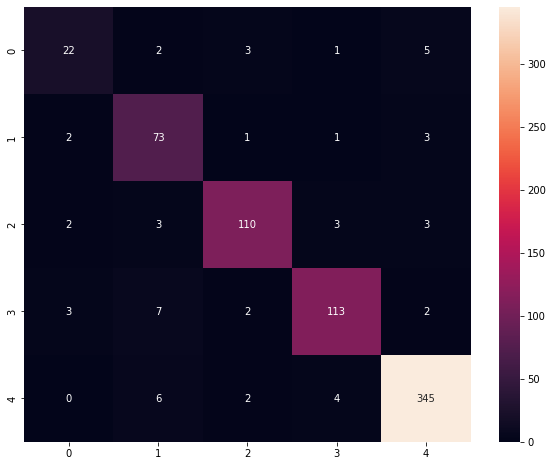

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot = True, fmt = 'd')
plt.show()